# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

In [4]:
# save config information.
url ="http://api.openweathermap.org/data/2.5/weather?"
units="metrics"

In [5]:
new_city=[]
lat=[]         
lng=[]           
max_temp=[]    
humidity =[]     
cloudiness =[] 
wind_speed =[]   
country =[]      
date  =[]   
index_counter=0
set_counter=1

query_url=(f"{url}appid={weather_api_key}&units={units}&q=")
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=36d27378545f7daafa9d3ff4e9ef2e7a&units=metrics&q='

In [6]:
print(f"Beginning Data Retrieval")
print(f"------------------------")

for city in cities:
    try:
        #time.sleep(1)

        response=requests.get(query_url +city)
        json_response=response.json()
        #print(json.dumps(json_response, indent=4, sort_keys=True))
        new_city.append(json_response["name"])
        lat.append(json_response["coord"]["lat"])
        lng.append(json_response["coord"]["lon"])
        max_temp.append(json_response["main"]["temp_max"])
        humidity.append(json_response["main"]["humidity"])
        cloudiness.append(json_response["clouds"]["all"])
        wind_speed.append(json_response["wind"]["speed"])
        country.append(json_response["sys"]["country"])
        date.append(json_response["dt"])
        if index_counter>99:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
        
        print(f"Processing {index_counter} of set {set_counter}:{city}")
    except KeyError:
        print("Another one!")
print(f"-------------------------------")
print(f"Ending Data Retrieval")

Beginning Data Retrieval
------------------------
Another one!
Processing 1 of set 1:rikitea
Processing 2 of set 1:atuona
Processing 3 of set 1:bluff
Processing 4 of set 1:vardo
Processing 5 of set 1:nanortalik
Processing 6 of set 1:tuktoyaktuk
Processing 7 of set 1:geraldton
Processing 8 of set 1:port lincoln
Processing 9 of set 1:labuhan
Processing 10 of set 1:saldanha
Processing 11 of set 1:senador jose porfirio
Processing 12 of set 1:new norfolk
Processing 13 of set 1:punta arenas
Processing 14 of set 1:lingao
Processing 15 of set 1:sassandra
Processing 16 of set 1:ribeira grande
Another one!
Processing 17 of set 1:turukhansk
Processing 18 of set 1:tessalit
Processing 19 of set 1:pevek
Processing 20 of set 1:mar del plata
Processing 21 of set 1:hobart
Processing 22 of set 1:cockburn town
Processing 23 of set 1:isangel
Processing 24 of set 1:tarancon
Processing 25 of set 1:mataura
Processing 26 of set 1:katsuura
Processing 27 of set 1:la ronge
Processing 28 of set 1:erzin
Processing

Another one!
Processing 46 of set 3:viedma
Processing 47 of set 3:bowen
Processing 48 of set 3:kloulklubed
Processing 49 of set 3:puerto baquerizo moreno
Processing 50 of set 3:merauke
Processing 51 of set 3:kotri
Processing 52 of set 3:alcaniz
Processing 53 of set 3:tadine
Processing 54 of set 3:yuzhnyy
Processing 55 of set 3:pundaguitan
Processing 56 of set 3:flinders
Processing 57 of set 3:kropotkin
Processing 58 of set 3:saint-pierre
Processing 59 of set 3:aykhal
Processing 60 of set 3:segezha
Processing 61 of set 3:kamiiso
Processing 62 of set 3:sargatskoye
Processing 63 of set 3:wenchi
Processing 64 of set 3:beringovskiy
Processing 65 of set 3:goure
Processing 66 of set 3:richards bay
Processing 67 of set 3:agidel
Processing 68 of set 3:necochea
Processing 69 of set 3:saquena
Processing 70 of set 3:santo antonio do ica
Processing 71 of set 3:souillac
Processing 72 of set 3:katobu
Another one!
Processing 73 of set 3:palu
Processing 74 of set 3:narsaq
Processing 75 of set 3:jalu
Pr

Another one!
Processing 96 of set 5:amapa
Processing 97 of set 5:pierre
Processing 98 of set 5:verkhnevilyuysk
Processing 99 of set 5:andenes
Processing 100 of set 5:buchanan
Processing 0 of set 6:isabela
Processing 1 of set 6:ugoofaaru
Processing 2 of set 6:erie
Processing 3 of set 6:akdepe
Processing 4 of set 6:port-gentil
Processing 5 of set 6:ardahan
Another one!
Processing 6 of set 6:padang
Processing 7 of set 6:vila velha
Processing 8 of set 6:strezhevoy
Processing 9 of set 6:ughelli
Processing 10 of set 6:abu kamal
Processing 11 of set 6:qaqortoq
Processing 12 of set 6:saint-leu
Processing 13 of set 6:puerto del rosario
Processing 14 of set 6:maningrida
Processing 15 of set 6:atambua
Processing 16 of set 6:majene
Processing 17 of set 6:garden city
Processing 18 of set 6:laguna
Processing 19 of set 6:matamoros
Processing 20 of set 6:chifeng
Another one!
Processing 21 of set 6:marovoay
Processing 22 of set 6:malinovoye ozero
Processing 23 of set 6:skoropuskovskiy
Processing 24 of 

In [7]:
new_weather_df=pd.DataFrame({"City":new_city,
                           "Lat":lat,
                           "Lng":lng,
                           "Max Temp":max_temp,
                           "Humidity":humidity,
                           "Cloudiness":cloudiness,
                           "Wind Speed":wind_speed,
                           "Country":country,
                           "Date":date})
new_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,294.37,70,41,9.90,PF,1597071860
1,Atuona,-9.80,-139.03,298.99,67,7,10.35,PF,1597071860
2,Bluff,-46.60,168.33,281.48,91,97,5.81,NZ,1597071860
3,Vardø,70.37,31.11,285.15,76,75,7.70,NO,1597071784
4,Nanortalik,60.14,-45.24,279.57,76,2,6.61,GL,1597071860


In [8]:
new_weather_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [9]:
new_weather_df.to_csv("../output_data/weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
new_weather2_df=new_weather_df.loc[new_weather_df["Humidity"]<=100]
new_weather2_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,294.37,70,41,9.90,PF,1597071860
1,Atuona,-9.80,-139.03,298.99,67,7,10.35,PF,1597071860
2,Bluff,-46.60,168.33,281.48,91,97,5.81,NZ,1597071860
3,Vardø,70.37,31.11,285.15,76,75,7.70,NO,1597071784
4,Nanortalik,60.14,-45.24,279.57,76,2,6.61,GL,1597071860
...,...,...,...,...,...,...,...,...,...
592,Bandarbeyla,9.49,50.81,299.19,64,1,15.15,SO,1597071928
593,Chegdomyn,51.12,133.02,289.24,93,76,2.48,RU,1597071928
594,Tupiza,-21.45,-65.72,291.24,17,0,0.53,BO,1597071928
595,Gaoua,10.30,-3.25,303.82,58,82,4.24,BF,1597071727


In [11]:
new_weather2_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,18.742680,23.355193,295.221926,67.350084,48.361809,3.730586,1.597072e+09
std,33.287811,90.206774,8.450080,22.092463,38.505248,2.503719,7.730253e+01
min,-54.800000,-179.170000,273.150000,7.000000,0.000000,0.030000,1.597072e+09
25%,-8.930000,-56.480000,289.430000,57.000000,4.000000,1.840000,1.597072e+09
50%,22.240000,26.400000,297.150000,71.000000,41.000000,3.180000,1.597072e+09
75%,45.330000,104.970000,301.480000,83.000000,89.000000,5.030000,1.597072e+09
max,78.220000,179.320000,317.240000,100.000000,100.000000,16.710000,1.597072e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
cities_indicies=new_weather_df.loc[new_weather_df["Humidity"]>100].index
cities_indicies


Int64Index([], dtype='int64')

In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


humidity_out=new_weather_df["Humidity"]
humidity_out
quartiles= humidity_out.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
#Determine the outlier using the upper and lower bound
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

outliers_indexes=new_weather_df.loc[(new_weather_df["Humidity"]<humidity_lower_bound) & (new_weather_df["Humidity"]>humidity_upper_bound)].index
outliers_indexes



clean_city_data = new_weather_df.drop(outliers_indexes, inplace=False)
fresh_data=clean_city_data.sort_values("Humidity", ascending=False)
fresh_data


18.0 and 122.0 are the outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
384,Vostok,46.49,135.88,288.56,100,72,1.50,RU,1597071904
225,Quesnel,53.00,-122.50,282.15,100,90,1.00,CA,1597071884
478,Hofn,64.25,-15.21,285.15,100,90,4.10,IS,1597071785
201,Ancud,-41.87,-73.82,279.26,100,75,2.10,CL,1597071881
138,Seoul,37.57,126.98,299.15,100,90,1.50,KR,1597071611
...,...,...,...,...,...,...,...,...,...
535,Bam,29.11,58.36,309.15,12,0,4.22,IR,1597071921
224,Sabha,27.04,14.43,314.40,10,27,3.18,LY,1597071884
17,Tessalit,20.20,1.01,314.02,9,0,3.35,ML,1597071862
397,Riyadh,24.69,46.72,313.15,7,5,9.30,SA,1597071906


In [33]:
#This is my own method and it's working 

humidity_out=new_weather_df["Humidity"]
humidity_out
quartiles= humidity_out.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
#Determine the outlier using the upper and lower bound
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

new_day_df=new_weather_df.loc[(new_weather_df["Humidity"]>humidity_lower_bound) & (new_weather_df["Humidity"]<humidity_upper_bound)]
new_day_df=new_day_df.sort_values("Humidity",ascending=False)
new_day_df

18.0 and 122.0 are the outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
443,Sturgeon Bay,44.83,-87.38,296.15,100,90,3.60,US,1597071911
72,São Gabriel da Cachoeira,-0.13,-67.09,297.15,100,90,1.00,BR,1597071866
80,Petropavlovsk-Kamchatskiy,53.05,158.65,285.15,100,40,1.00,RU,1597071866
138,Seoul,37.57,126.98,299.15,100,90,1.50,KR,1597071611
484,Grindavik,63.84,-22.43,284.15,100,75,10.30,IS,1597071915
...,...,...,...,...,...,...,...,...,...
280,Bonito,-21.12,-56.48,303.88,22,0,4.21,BR,1597071890
253,Alcañiz,41.05,-0.13,309.96,22,46,6.86,ES,1597071887
240,Ţahţā,26.77,31.50,314.15,20,100,3.10,EG,1597071885
276,Jalu,29.03,21.55,310.50,20,1,5.27,LY,1597071890


In [15]:
# Extract relevant fields from the data frame
extract_data=new_day_df[["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
extract_data


,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
443,44.83,296.15,100,90,3.60
72,-0.13,297.15,100,90,1.00
80,53.05,285.15,100,40,1.00
138,37.57,299.15,100,90,1.50
484,63.84,284.15,100,75,10.30
...,...,...,...,...,...
280,-21.12,303.88,22,0,4.21
253,41.05,309.96,22,46,6.86
240,26.77,314.15,20,100,3.10
276,29.03,310.50,20,1,5.27


In [16]:
# Export the City_Data into a csv
extract_data.to_csv("../output_data/extra.csv",index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

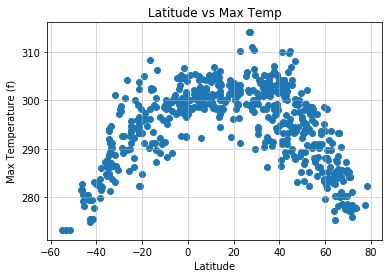

In [17]:
plt.scatter(extract_data['Lat'],extract_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.title("Latitude vs Max Temp")

#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Max Temp.png")

plt.show()

## Latitude vs. Humidity Plot

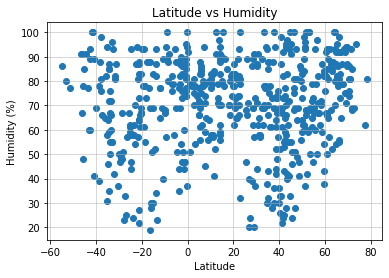

In [18]:
plt.scatter(extract_data['Lat'],extract_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

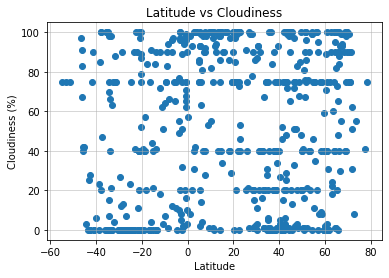

In [19]:
plt.scatter(extract_data['Lat'],extract_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

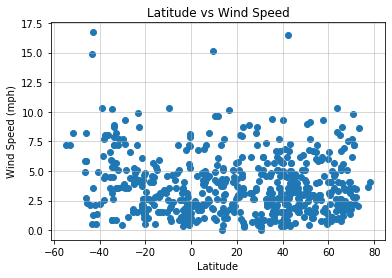

In [20]:
plt.scatter(extract_data['Lat'],extract_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Wind Speed.png")

plt.show()

## Linear Regression

In [21]:
northern_hemisphere=extract_data.loc[extract_data["Lat"]>=0]
northern_hemisphere

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
443,44.83,296.15,100,90,3.60
80,53.05,285.15,100,40,1.00
138,37.57,299.15,100,90,1.50
484,63.84,284.15,100,75,10.30
225,53.00,282.15,100,90,1.00
...,...,...,...,...,...
258,45.44,304.15,24,13,4.76
311,27.27,314.15,24,99,2.60
253,41.05,309.96,22,46,6.86
240,26.77,314.15,20,100,3.10


In [22]:
southern_hemisphere=extract_data.loc[clean_city_data["Lat"]<0]
southern_hemisphere

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
72,-0.13,297.15,100,90,1.00
570,-41.45,275.37,100,90,0.50
127,-8.93,288.34,100,83,0.78
201,-41.87,279.26,100,75,2.10
70,-38.07,281.48,98,100,2.56
...,...,...,...,...,...
167,-23.70,292.15,24,0,7.20
77,-27.78,292.57,23,0,1.09
235,-13.44,306.42,23,0,2.94
280,-21.12,303.88,22,0,4.21


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

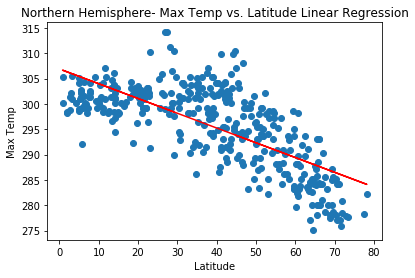

In [23]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

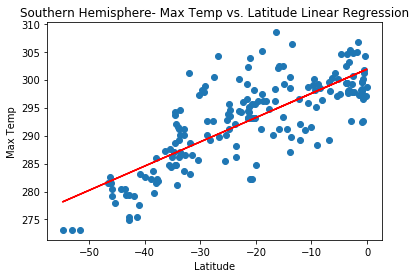

In [24]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere- Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Sorthern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
%matplotlib inline

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

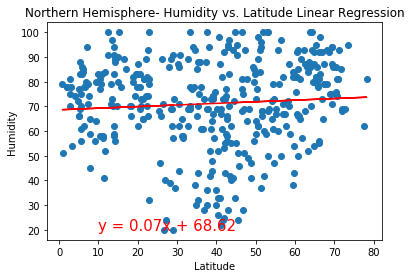

In [36]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Humidity"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere- Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

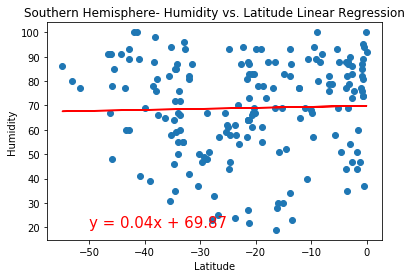

In [35]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Humidity"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere- Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Sorthern Hemisphere - Humidity vs. Latitude Linear Regression.png")
%matplotlib inline

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

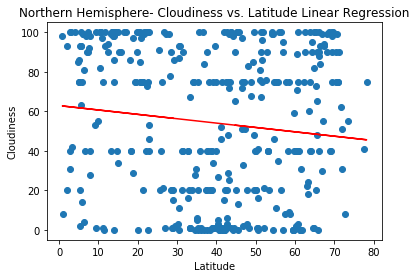

In [27]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Cloudiness"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere- Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

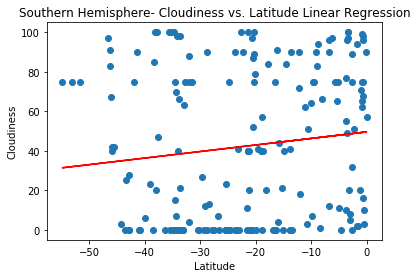

In [28]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere- Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
%matplotlib inline

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

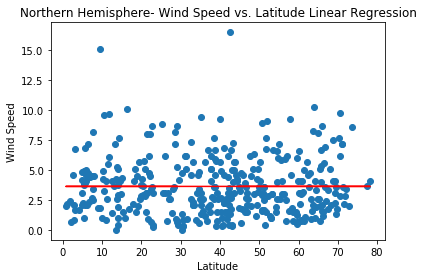

In [29]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Wind Speed"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere- Wind Speed vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

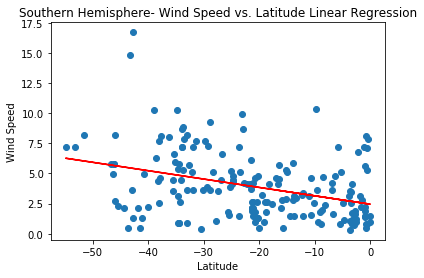

In [30]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere- Wind Speed vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
%matplotlib inline